In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
#importing the training and testing datasets

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# print shape of the datasets

print("The shape of training data is :{}".format(train.shape))
print("The shape of testing data is :{}".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# dropping the ID column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

The shape of training data is :(1460, 81)
The shape of testing data is :(1459, 80)


In [6]:
# print shape of the datasets

print("The shape of training data is :{}".format(train.shape))
print("The shape of testing data is :{}".format(test.shape))

The shape of training data is :(1460, 80)
The shape of testing data is :(1459, 79)


## Data Preprocessing

GrLivArea: Above grade (ground) living area square feet

Let's explore the scatterplot of Sales Price v/s GrLivArea and see if there are any outliers present.

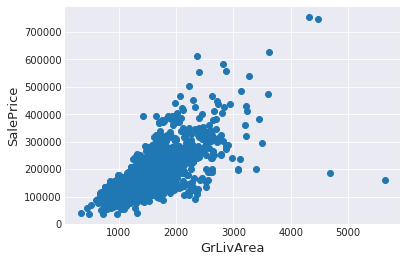

In [7]:
fig, plot = plt.subplots()
plot.scatter(x= train['GrLivArea'], y= train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see two outliers beyond 4000 mark. Very less price for very large area. It might be coz of home condition or any other factor. We will remove these two outliers.

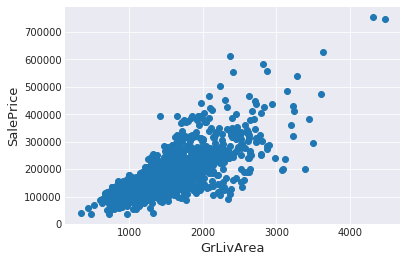

In [8]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Checking the plot again
fig, plot = plt.subplots()
plot.scatter(x= train['GrLivArea'], y= train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Visualizing the target variable, i.e, The SalePrice

Text(0.5,1,'SalePrice distribution')

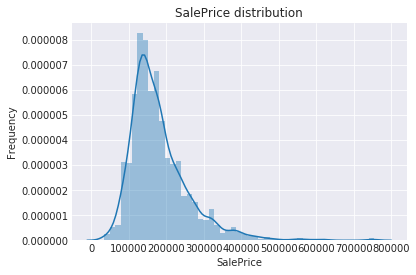

In [9]:
# Distribution plot

sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

The SalePrice variable is clearly right skewed. We will change it normally distributed using log transformation as linear models love normally distributed data.

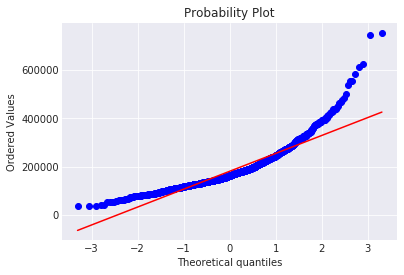

In [10]:
#probability plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Applying log transformation to the target variable

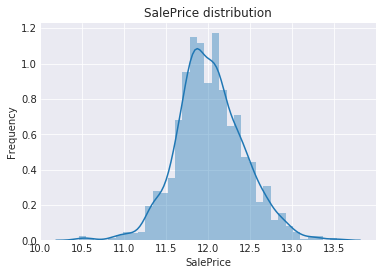

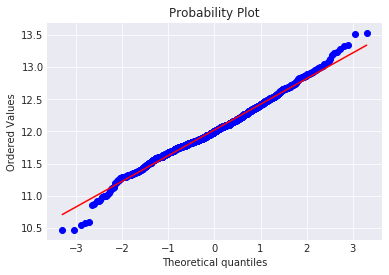

In [11]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# distribution plot
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# probability plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## Feature Engineering

Concatenating training and testing datasets. We will split them later.

In [12]:
tr_rows = train.shape[0]
te_rows = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("Data's shape is : {}".format(data.shape))

Data's shape is : (2917, 79)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

As we can see that values are missing from many columns but there are 4 columns in which more than 80% of the values are missing. These are:
    "Alley", "Fence", "MiscFeature", "PoolQC"

In [14]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
BsmtUnfSF        0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
dtype: float64

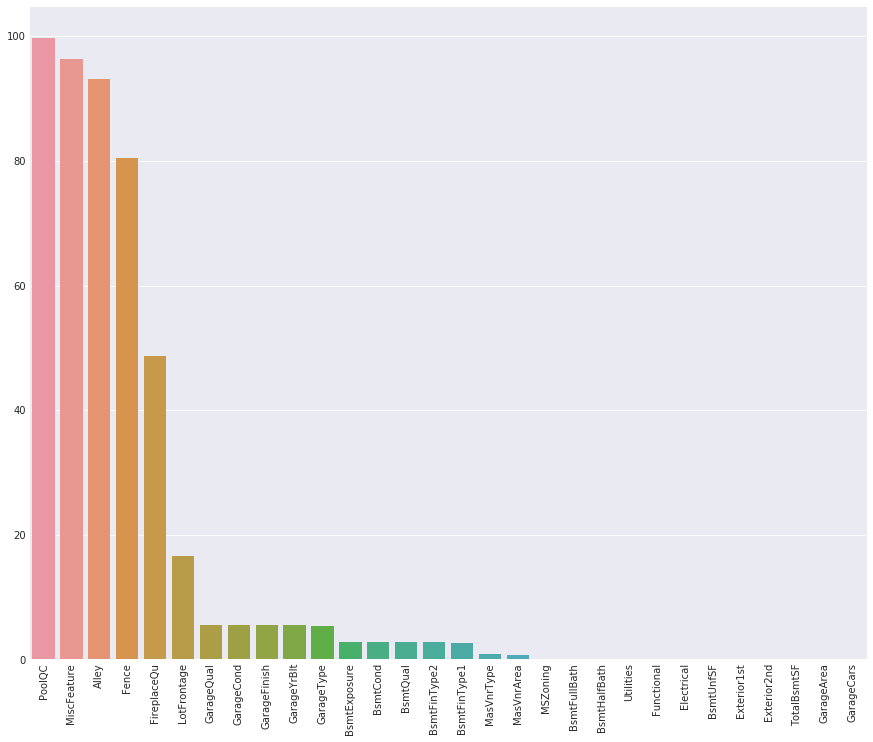

In [15]:
plt.figure(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x= data_na.index, y= data_na)

#### Imputing missing values

Reference taken from:

#### https://www.kaggle.com/c/5407/download/data_description.txt

* PoolQC - Pool Quality.
Here NA represents "No Pool"

In [16]:
data["PoolQC"] = data["PoolQC"].fillna("None")

* MiscFeature - Miscellaneous feature not covered in other categories.
Here NA represents "None", meaning no added misc features.

In [17]:
data["MiscFeature"] = data["MiscFeature"].fillna("None")

* Alley - Type of alley access to property.
Here NA means "No alley access"

In [18]:
data["Alley"] = data["Alley"].fillna("None")

* Fence - Fence quality.
Here NA means "No Fence"

In [19]:
data["Fence"] = data["Fence"].fillna("None")

* FireplaceQu - Fireplace quality.
Here NA means "No Fireplace"

In [20]:
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")

* LotFrontage - Linear feet of street connected to property.
Let impute the missing values with the mode of the values in "LotFrontage"

In [21]:
data["LotFrontage"].mode()

0    60.0
dtype: float64

In [22]:
data["LotFrontage"] = data["LotFrontage"].fillna(60.0)

* GarageType, GarageFinish, GarageQual and GarageCond.
In all these NA means "No Garage"

In [23]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

* GarageArea and GarageCars. We will replace missing Data with 0
* GarageYrBlt. We will drop this column as I don't think that the year of built of garage will matter much while buying a home.

In [24]:
for col in ('GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
    
data.drop("GarageYrBlt", axis= 1, inplace= True)

* BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath - missing values are likely zero for having no basement

In [25]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

* BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2.
Here NA means "No Basement"

In [26]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

* MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We will fill 0 for the area and None for the type.

In [27]:
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

* MSZoning (The general zoning classification).

In [28]:
data['MSZoning'].mode()

0    RL
dtype: object

In [29]:
# 'RL' is by far the most common value. So we will fill in missing values with 'RL'

data['MSZoning'] = data['MSZoning'].fillna('RL')

* Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We will remove it.

In [30]:
data = data.drop(['Utilities'], axis=1)

* Functional - Home functionality (Assume typical unless deductions are warranted)

In [31]:
data['Functional'].unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', nan],
      dtype=object)

As data description says that "Assume typical unless deductions are warranted", we will replace Nan with 'Typ'

In [32]:
data['Functional'] = data['Functional'].fillna('Typ')

* Electrical - Electrical system

In [33]:
data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [34]:
# This feature has mostly 'SBrkr', we will set that for the missing value.

data['Electrical'] = data['Electrical'].fillna('SBrkr')

* KitchenQual - Kitchen quality
Only one NA value

In [35]:
data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [36]:
# This feature has mostly 'TA', we will set that for the missing value.

data['KitchenQual'] = data['KitchenQual'].fillna('TA')

* Exterior1st and Exterior2nd - Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [37]:
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

* SaleType - Fill in again with most frequent.

In [38]:
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

* MSSubClass - Na most likely means No building class. We will replace missing values with None

In [39]:
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 77 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

As we can see that there are no null values left. Hence, we can move forward.

#### Transforming some numerical variables that are really categorical

In [41]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Year Sold
data['YrSold'] = data['YrSold'].astype(str)

#### Label Encoding some of the categorical features

In [42]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'YrSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (2917, 77)


Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [43]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [44]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewed_feats = skewed_feats[abs(skewed_feats)>0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewed_feats.shape[0]))

from scipy.special import boxcox1p
skewed = skewed_feats.index
lam = 0.15
for feat in skewed:
    data[feat] = boxcox1p(data[feat], lam)

There are 35 skewed numerical features to Box Cox transform


In [45]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.692623,11.686189,0.0,1,3,1Fam,1.820334,1.540963,11.170327,0.0,...,WD,0.0,0.730463,8,856.0,0.000000,2003,2003,2,14.976591
1,12.792276,0.000000,0.0,1,3,1Fam,1.820334,0.730463,12.062832,0.0,...,WD,0.0,0.730463,6,1262.0,9.010206,1976,1976,1,14.923100
2,11.892039,11.724598,0.0,1,3,1Fam,1.820334,1.194318,10.200343,0.0,...,WD,0.0,0.730463,6,920.0,0.000000,2001,2002,2,15.149678
3,12.013683,11.354094,0.0,1,3,1Fam,0.730463,1.540963,8.274266,0.0,...,WD,0.0,0.730463,7,756.0,0.000000,1915,1970,0,14.857121
4,12.510588,12.271365,0.0,1,4,1Fam,1.820334,0.000000,10.971129,0.0,...,WD,0.0,0.730463,9,1145.0,8.013884,2000,2000,2,15.852312


#### Getting dummy categorical features

In [46]:
data = pd.get_dummies(data)
print(data.shape)
data.head()

(2917, 219)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,1,3,1.820334,1.540963,11.170327,0.0,2,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,1,3,1.820334,0.730463,12.062832,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,1,3,1.820334,1.194318,10.200343,0.0,2,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,1,3,0.730463,1.540963,8.274266,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,1,4,1.820334,0.000000,10.971129,0.0,2,...,0,0,0,0,0,0,0,0,0,1


Getting the new train and test sets.

In [47]:
train = data[:tr_rows]
test = data[tr_rows:]

### Modelling

In [48]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [49]:
# Cross-Validation
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### Base Models

In [50]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [51]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [52]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [53]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [54]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [55]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### Models Scores

In [56]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1101 (0.0071)



In [57]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1101 (0.0071)



In [62]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1775 (0.0090)



In [63]:
score = rmsle_cv(model_xgb)
print("XGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGBoost score: 0.1172 (0.0063)



In [64]:
score = rmsle_cv(model_lgb)
print("lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

lightgbm score: 0.1158 (0.0059)



Stacking Base Models

In [65]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [66]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1127 (0.0077)



In [67]:
def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

#### Training and predictions

Elastic Net Regression:

In [76]:
ENet.fit(train, y_train)
ENet_train_pred = ENet.predict(train)
ENet_pred = np.expm1(ENet.predict(test))
print(rmsle(y_train, ENet_train_pred))

0.09993836077798124


XGBoost Regression:

In [77]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07904048984847975


LightGBM Regression:

In [78]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07217805847934206


Averaged Model Regression:

In [79]:
averaged_models.fit(train, y_train)
averaged_train_pred = averaged_models.predict(train)
averaged_pred = np.expm1(averaged_models.predict(test.values))
print(rmsle(y_train, averaged_train_pred))

0.07029317075168173


In [84]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,averaged_train_pred*0.50 +
               xgb_train_pred*0.10 + lgb_train_pred*0.40 ))

RMSLE score on train data:
0.0695949970431995


Ensemble Prediction

In [88]:
ensemble = averaged_pred*0.50 + xgb_pred*0.10 + lgb_pred*0.40

Submission

In [89]:
print(ensemble.shape)
print(test.shape)

(1459,)
(1459, 219)


In [90]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)